# 收集数据和预处理

## 收集数据

In [1]:
import numpy as np #导入NumPy
import pandas as pd #导入Pandas

df_sales = pd.read_csv('易速鲜花订单记录.csv') #载入数据
df_sales.head() #显示头几行数据  

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


## 整理记录的时间范围

In [2]:
print('日期范围: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围（格式转换前）
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转换日期格式
print('日期范围: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))#显示日期范围
df_sales = df_sales.loc[df_sales['消费日期'] < '2021-06-01'] #只保留整月数据
print('日期范围: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围

日期范围: 1/1/2021 10:11 ~ 9/9/2020 9:20
日期范围: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00
日期范围: 2020-06-01 09:09:00 ~ 2021-05-31 17:39:00


## 数据清洗

In [3]:
df_sales = df_sales.drop_duplicates() #删除重复的数据行
# df_sales = df_sales.loc[df_sales['数量'] > 0] # 本来应该清洗掉数量小于等于0的数据，但实际上执行以后效果差了很多，暂不清楚为什么

## 特征工程

In [4]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


## 构建特征和标签

In [5]:
df_sales_3m = df_sales[(df_sales.消费日期 > '2020-06-01') & (df_sales.消费日期 <= '2020-08-30')] #构建仅含头三个月数据的数据集
df_sales_3m.reset_index(drop=True) #重置索引

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.40
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.60
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.20
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.50
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.50
...,...,...,...,...,...,...,...,...,...
14564,545190,22937,2020-08-29 15:32:00,产品说明掩码,6,18.00,15656,苏州,108.00
14565,545190,22722,2020-08-29 15:32:00,产品说明掩码,4,39.50,15656,苏州,158.00
14566,545190,22457,2020-08-29 15:32:00,产品说明掩码,60,3.00,15656,苏州,180.00
14567,545190,22464,2020-08-29 15:32:00,产品说明掩码,12,25.00,15656,苏州,300.00


## 构建 RFM 值

In [6]:
df_user_LTV = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构
df_user_LTV.columns = ['用户码'] #设定字段名
df_user_LTV.head() #显示头几行数据
df_R_value = df_sales_3m.groupby('用户码').消费日期.max().reset_index() #找到每个用户的最近消费日期，构建df_R_value对象
df_R_value.columns = ['用户码','最近购买日期'] #设定字段名
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days #计算最新日期与上次消费日期的天数
df_user_LTV = pd.merge(df_user_LTV, df_R_value[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_F_value = df_sales_3m.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_F_value对象
df_F_value.columns = ['用户码','F值'] #设定字段名
df_user_LTV = pd.merge(df_user_LTV, df_F_value[['用户码','F值']], on='用户码') #把消费频率(F值)整合至df_user结构
df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index() #计算每个用户三个月消费总额，构建df_M_value对象
df_M_value.columns = ['用户码','M值'] #设定字段名
df_user_LTV = pd.merge(df_user_LTV, df_M_value, on='用户码') #把消费总额整合至df_user结构
df_user_LTV #显示用户表结构

,用户码,R值,F值,M值
0,15100,45,6,635.10
1,15291,35,35,1329.95
2,14688,6,85,1472.28
3,15311,5,715,12711.66
4,15862,89,64,354.23
...,...,...,...,...
365,15951,1,22,375.17
366,14745,1,7,240.60
367,15724,0,5,103.65
368,15874,0,5,584.35


## 计算用户一整年的 LTV

In [7]:
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index() #计算每个用户整年消费总额，构建df_user_1y对象
df_user_1y.columns = ['用户码','年度LTV'] #设定字段名
df_user_1y.head() #显示头几行数据
df_LTV = pd.merge(df_user_LTV, df_user_1y, on='用户码', how='left') #构建整体LTV训练数据集
df_LTV #显示df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,45,6,635.10,635.10
1,15291,35,35,1329.95,4596.51
2,14688,6,85,1472.28,4449.48
3,15311,5,715,12711.66,58218.04
4,15862,89,64,354.23,659.73
...,...,...,...,...,...
365,15951,1,22,375.17,375.17
366,14745,1,7,240.60,1167.16
367,15724,0,5,103.65,212.30
368,15874,0,5,584.35,4330.67


## 创建特征集和标签集

In [8]:
X = df_LTV.drop(['用户码','年度LTV'],axis=1) #特征集
X.head() #显示特征集

,R值,F值,M值
0,45,6,635.10
1,35,35,1329.95
2,6,85,1472.28
3,5,715,12711.66
4,89,64,354.23


In [9]:
y = df_LTV['年度LTV'] #标签集
y.head() #显示标签集

0      635.10
1     4596.51
2     4449.48
3    58218.04
4      659.73
Name: 年度LTV, dtype: float64

## 拆分训练集、验证集和测试集

In [10]:
from sklearn.model_selection import train_test_split
# 先拆分训练集和其它集
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state = 36)
# 再把其它集拆分成验证集和测试集 
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state = 36)

# 特征选择

## 相关性热力图

/Users/pangjiawei/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

/Users/pangjiawei/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


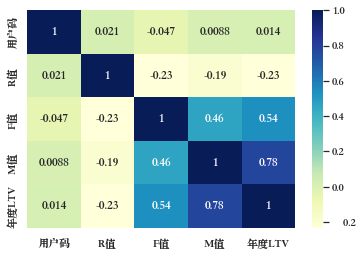

In [11]:
# 对所有的标签和特征两两显示其相关性热力图(heatmap)

import seaborn as sns
sns.set_theme(font='Songti SC')
sns.heatmap(df_LTV.corr(), cmap="YlGnBu", annot = True)

## 使用 SelectBest 选择特征

In [12]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression  #导入特征选择工具
selector = SelectKBest(mutual_info_regression, k = 2) #选择最重要的两个特征
selector.fit(X, y) #用特征选择模型拟合数据集
X.columns[selector.get_support()] #输出选中的两个特征

Index(['F值', 'M值'], dtype='object')

# 特征缩放

## 标准化缩放

In [13]:
from sklearn.preprocessing import StandardScaler #导入标准化缩放器
scaler = StandardScaler() #创建标准化缩放器
X_train_standard = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_valid_standard = scaler.transform(X_valid) #转换验证集数据
X_test_standard = scaler.transform(X_test) #转换测试集数据

## 归一化缩放

In [14]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train_minmax = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_valid_minmax = scaler.transform(X_valid) #转换验证集数据
X_test_minmax = scaler.transform(X_test) #转换测试集数据

# 虚拟变量

In [15]:
# 把多分类字段转换为二分类虚拟变量 
category_features = ['城市'] #要转换的特征列表
df_sales_virtual = pd.get_dummies(df_sales, drop_first=True, columns=category_features) #创建哑变量
df_sales_virtual #显示数据

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,总价,城市_北京,城市_广州,城市_成都,城市_深圳,城市_苏州,城市_西安
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,350.40,1,0,0,0,0,0
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,165.60,0,0,0,0,0,0
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,163.20,0,0,0,0,0,0
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,19.50,1,0,0,0,0,0
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,19.50,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83817,C579886,23460,2021-05-31 17:39:00,产品说明掩码,-2,9.95,15676,-19.90,0,0,0,0,1,0
83818,C579886,23458,2021-05-31 17:39:00,产品说明掩码,-2,14.95,15676,-29.90,0,0,0,0,1,0
83819,C579886,22170,2021-05-31 17:39:00,产品说明掩码,-3,6.75,15676,-20.25,0,0,0,0,1,0
83820,C579886,22197,2021-05-31 17:39:00,产品说明掩码,-1,0.85,15676,-0.85,0,0,0,0,1,0


# 创建模型并训练

In [16]:
from sklearn.ensemble import RandomForestRegressor #导入随机森林回归模型

# 不使用特征缩放
model_rfr = RandomForestRegressor() #创建随机森林回归模型
model_rfr.fit(X_train, y_train) #拟合随机森林模型

# 标准化缩放
model_rfr_standard = RandomForestRegressor() #创建随机森林回归模型
model_rfr_standard.fit(X_train_standard, y_train) #拟合随机森林模型

# 归一化缩放
model_rfr_minmax = RandomForestRegressor() #创建随机森林回归模型
model_rfr_minmax.fit(X_train_minmax, y_train) #拟合随机森林模型

RandomForestRegressor()

# 评估模型

## 预测验证集

In [17]:
y_valid_preds_rfr = model_rfr.predict(X_valid) 
y_valid_preds_rfr_standard = model_rfr_standard.predict(X_valid_standard) 
y_valid_preds_rfr_minmax = model_rfr_minmax.predict(X_valid_minmax) 

## 抽查验证集预测结果

In [18]:
X_valid.iloc[2] #随便选择一个数据

R值       1.00
F值     153.00
M值    1413.83
Name: 163, dtype: float64

In [19]:
print('真值:', y_valid.iloc[2])  #真值
print('不使用特征缩放预测值:', y_valid_preds_rfr[2])
print('标准化缩放预测值:', y_valid_preds_rfr_standard[2])
print('归一化缩放预测值:', y_valid_preds_rfr_minmax[2])

真值: 4391.94
不使用特征缩放预测值: 4592.017000000002
标准化缩放预测值: 4263.063900000003
归一化缩放预测值: 4367.820100000002


## 使用 R2 指标评估模型的预测准确率

In [20]:
from sklearn.metrics import r2_score, median_absolute_error #导入Sklearn评估模块
print('验证集上的R平方分数-不使用特征缩放: %0.4f' % r2_score(y_valid, model_rfr.predict(X_valid)))
print('验证集上的R平方分数-标准化缩放: %0.4f' % r2_score(y_valid, model_rfr_standard.predict(X_valid_standard)))
print('验证集上的R平方分数-归一化缩放: %0.4f' % r2_score(y_valid, model_rfr_minmax.predict(X_valid_minmax)))

验证集上的R平方分数-不使用特征缩放: 0.5403
验证集上的R平方分数-标准化缩放: 0.4931
验证集上的R平方分数-归一化缩放: 0.4959


## 运行测试集

Text(0.5, 1.0, '实际值 vs. 预测值')

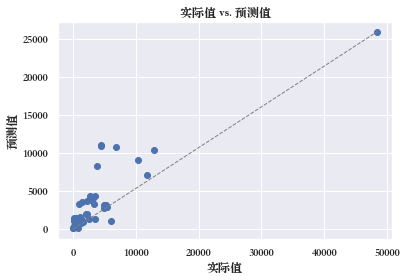

In [21]:
y_test_preds_rfr = model_rfr.predict(X_test) #用模型预随机森林模型预测验证集

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='Songti SC' # 设置字体，必须是本地有的
plt.scatter(y_test, y_test_preds_rfr) #预测值和实际值的散点图
plt.plot([0, max(y_test)], [0, max(y_test_preds_rfr)],   color='gray', lw=1, linestyle='--') #绘图
plt.xlabel('实际值') #X轴
plt.ylabel('预测值') #Y轴
plt.title('实际值 vs. 预测值') #标题

## 绘制模型性能比较图

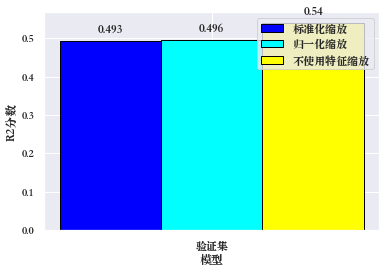

In [22]:
import numpy as np #导入NumPy
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i/50+x[i], round(y[i], 3)+0.02, round(y[i], 3), ha = 'center')

# fig = plt.figure()
fig, ax = plt.subplots()    
# ax = fig.add_axes([0,0,1,1])
# scaler = ['StandardScaler', 'MinMaxScaler']

width = 0.25

# bars1 = [r2_score(y_train, model_lr.predict(X_train_norm)),
#          r2_score(y_train, model_lasso.predict(X_train_norm)),
#         r2_score(y_train, model_ridge.predict(X_train_norm))]
bars1 = [r2_score(y_valid, model_rfr_standard.predict(X_valid_standard))]
bars2 = [r2_score(y_valid, model_rfr_minmax.predict(X_valid_minmax))]
bars3 = [r2_score(y_valid, model_rfr.predict(X_valid))]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width*2 for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = width, color = 'blue', edgecolor = 'black', capsize=7, label='标准化缩放')
 
# Create cyan bars
plt.bar(r2, bars2, width = width, color = 'cyan', edgecolor = 'black', capsize=7, label='归一化缩放')

# Create cyan bars
plt.bar(r3, bars3, width = width, color = 'yellow', edgecolor = 'black', capsize=7, label='不使用特征缩放')

# general layout
# plt.xticks([r + width/2 for r in range(len(bars1))], ['训练集', '测试集'])
plt.xticks([r + width for r in range(len(bars1))], ['验证集'])
plt.ylabel('R2分数')
plt.xlabel('模型')
plt.legend()


# calling the function to add value labels
addlabels(r1, bars1)
addlabels(r2, bars2)
addlabels(r3, bars3)
 
# Show graphic
plt.show()